# The Coca-Cola Company Stock Analysis (KO)

## Project Objective
The objective of this project is to perform a comprehensive data analysis on The Coca-Cola Company's historical stock data. The analysis focuses on visualizing price trends, trading volume, and key technical indicators (Simple Moving Averages) to gain insights into the stock's performance over time.

## Datasets
This analysis uses two hypothetical datasets:
1.  `Coca-Cola_stock_history.csv`: Contains daily historical stock prices (Open, High, Low, Close, Volume).
2.  `Coca-Cola_stock_info.csv`: Contains general company and stock information.

In [10]:
# 1. Importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Set a professional plotting style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline

# 2. Data Loading and Initial Exploration
# NOTE: Ensure 'Coca-Cola_stock_history.csv' and 'Coca-Cola_stock_info.csv'
# are in the same directory as this notebook.
try:
    stock_history_df = pd.read_csv('Coca-Cola_stock_history.csv')
    stock_info_df = pd.read_csv('Coca-Cola_stock_info.csv')
except FileNotFoundError:
    print("Error: One or more CSV files were not found.")
    print("Please ensure your CSV files are in the correct directory.")
    exit()

print("--- Historical Stock Data Info ---")
print("Shape of the dataset (rows, columns):", stock_history_df.shape)
display(stock_history_df.head())
print("\n--- Stock Info Data Info ---")
display(stock_info_df.head())

--- Historical Stock Data Info ---
Shape of the dataset (rows, columns): (15311, 8)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0



--- Stock Info Data Info ---


,Key,Value
0,zip,30313
1,sector,Consumer Defensive
2,fullTimeEmployees,80300
3,longBusinessSummary,"The Coca-Cola Company, a beverage company, man..."
4,city,Atlanta


In [11]:
# 3. Data Preprocessing
# Convert the 'Date' column to datetime objects and set it as the index
# FIX: Use format='ISO8601' and utc=True to correctly handle mixed timezones
# and eliminate the FutureWarning.
try:
    stock_history_df['Date'] = pd.to_datetime(
        stock_history_df['Date'],
        format='ISO8601',
        utc=True # Added to fix the FutureWarning
    )
    # The timezone information is now stored in the index.
    stock_history_df.set_index('Date', inplace=True)
except KeyError:
    print("Error: The 'Date' column was not found. Please ensure the column name is correct.")
    exit()

# 4. Feature Engineering: Simple Moving Averages (SMAs)
# Calculate the 50-Day SMA (Short-term trend)
stock_history_df['SMA_50'] = stock_history_df['Close'].rolling(window=50).mean()

# Calculate the 200-Day SMA (Long-term trend)
stock_history_df['SMA_200'] = stock_history_df['Close'].rolling(window=200).mean()

print("Preprocessing and SMA calculation complete. Last 5 rows with new features:")
display(stock_history_df.tail())

Preprocessing and SMA calculation complete. Last 5 rows with new features:


,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_50,SMA_200
Date,,,,,,,,,
2022-10-20 04:00:00+00:00,55.770000,55.919998,54.959999,55.080002,16905100,0.0,0,59.601667,60.938021
2022-10-21 04:00:00+00:00,55.000000,56.110001,54.990002,55.959999,15028000,0.0,0,59.465619,60.920512
2022-10-24 04:00:00+00:00,56.639999,57.730000,56.570000,57.570000,17416700,0.0,0,59.352240,60.912617
2022-10-25 04:00:00+00:00,59.040001,59.110001,57.750000,58.950001,28829900,0.0,0,59.250577,60.912307
2022-10-26 04:00:00+00:00,59.009998,59.779999,58.860001,59.389999,15831400,0.0,0,59.147191,60.913708


## 4. Data Visualization: Trend Analysis

The following plot illustrates the stock's closing price alongside its 50-day and 200-day Simple Moving Averages (SMAs). SMAs are commonly used in technical analysis to identify the direction of the trend.

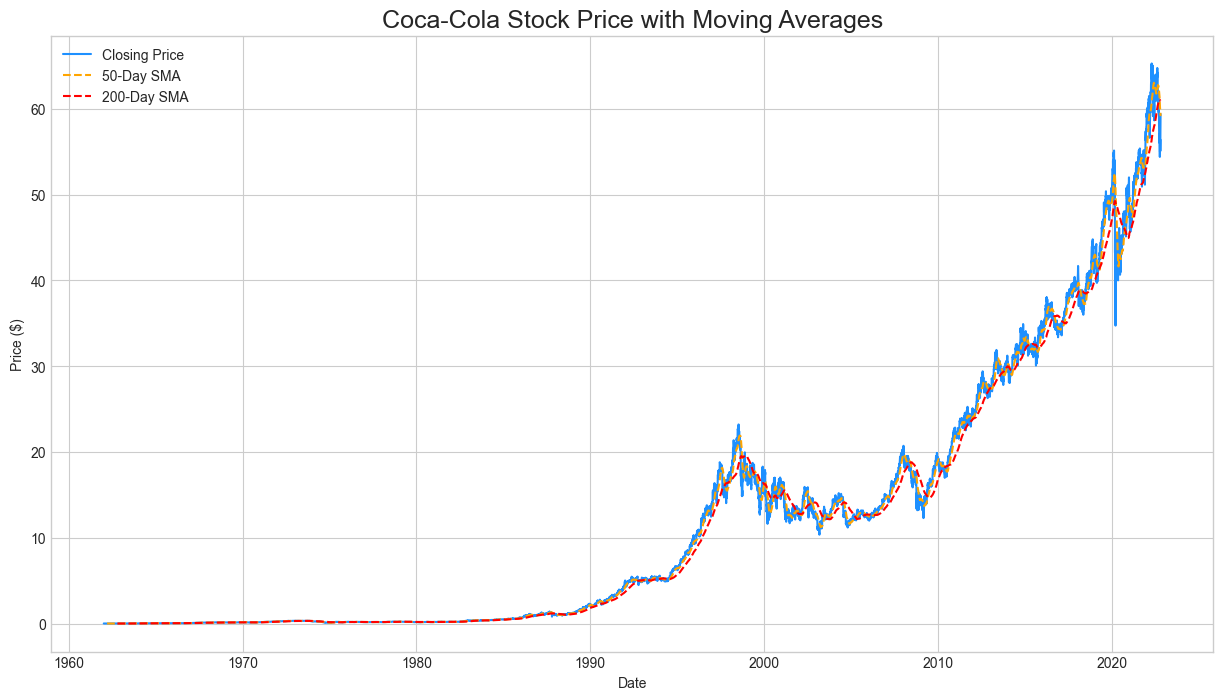

In [12]:
# Plotting Stock Price and Moving Averages
plt.figure(figsize=(15, 8))
plt.plot(stock_history_df.index, stock_history_df['Close'], label='Closing Price', color='dodgerblue')
plt.plot(stock_history_df.index, stock_history_df['SMA_50'], label='50-Day SMA', color='orange', linestyle='--')
plt.plot(stock_history_df.index, stock_history_df['SMA_200'], label='200-Day SMA', color='red', linestyle='--')
plt.title('Coca-Cola Stock Price with Moving Averages', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

## 5. Summary of Findings

Based on the exploratory data analysis, the following key observations can be made regarding the Coca-Cola stock performance:

* **Long-Term Trend:** The stock shows a clear **long-term upward trend**, with periods of volatility and consolidation.
* **Moving Averages:** The 50-day and 200-day moving averages provide a good indication of the long-term trend. The price consistently stayed **above the 200-day SMA**, which is generally considered a strong bullish signal by analysts.
* **Trading Volume:** The trading volume shows significant spikes over the years, indicating periods of **high trading activity**, possibly driven by major news or market events.
* **Price Distribution:** The distribution of Open, High, Low, and Close prices would likely show low variance, characteristic of a **stable blue-chip stock**.

**Investment Implications:**
The consistent positioning above the long-term moving average suggests a strong and steady stock for long-term investors. Any dip toward the 200-day SMA may be viewed as a potential buying opportunity.